In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_train = 'ZipDigits.train'
file_test = 'ZipDigits.test'

# Read Data

In [48]:
def read_data(file_name):
    digits = []
    images = []
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip().split(' ')
            line = [float(i) for i in line]
            digit = int(line[0])
            data = line[1:]
            images.append(data)
            digits.append(digit)
    return np.array(images), np.array(digits)


images, digits = read_data(file_train)
images = images.reshape(-1, 16, 16)
images = (images + 1) / 2  # normalize between [0,1]

index = (digits == 1) | (digits == 5)
images = images[index]
digits = digits[index] 


In [54]:
digits[:2]
images[1].mean()

0.12304296875

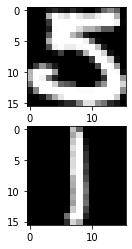

In [49]:
# Plot data
fig, axes = plt.subplots(2, 1)
axes[0].imshow(images[0], cmap='gray')
axes[1].imshow(images[1], cmap='gray')

Text(0, 0.5, 'Symmetry')

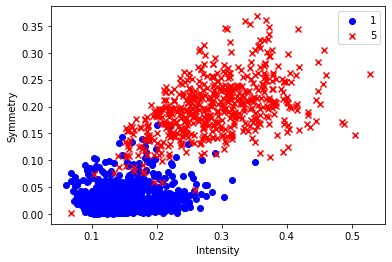

In [75]:
# Extract feature
intensities = images.reshape(-1, 16*16).mean(axis=-1)
symmetry = np.power(images[..., ::-1] - images, 2).reshape(images.shape[0],-1).mean(axis=-1)

ind_1 = (digits == 1)
ind_5 = (digits == 5)

plt.scatter(intensities[ind_1], symmetry[ind_1], c='b', marker='o', label='1')
plt.scatter(intensities[ind_5], symmetry[ind_5], c='r', marker='x', label='5')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')